# Operators

In [2]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

In [3]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [4]:
XX.data

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [5]:
input_dim, output_dim = XX.dim
input_dim, output_dim

(4, 4)

In [6]:
op = Operator(np.random.rand(2 ** 1, 2 ** 2))
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (2, 2)
Output dimensions: (2,)


In [7]:
op = Operator(np.random.rand(6, 6))
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (6,)
Output dimensions: (6,)


In [8]:
# Force input dimension to be (4,) rather than (2, 2)
op = Operator(np.random.rand(2 ** 1, 2 ** 2), input_dims=[4])
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (4,)
Output dimensions: (2,)


In [9]:
# Specify system is a qubit and qutrit
op = Operator(np.random.rand(6, 6),
              input_dims=[2, 3], output_dims=[2, 3])
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (2, 3)
Output dimensions: (2, 3)


In [10]:
print('Dimension of input system 0:', op.input_dims([0]))
print('Dimension of input system 1:', op.input_dims([1]))

Dimension of input system 0: (2,)
Dimension of input system 1: (3,)


In [11]:
# Create an Operator from a Pauli object

pauliXX = Pauli('XX')
Operator(pauliXX)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [12]:
# Create an Operator for a Gate object
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [13]:
# Create an operator from a parameterized Gate object
Operator(RXGate(np.pi / 2))

Operator([[0.70710678+0.j        , 0.        -0.70710678j],
          [0.        -0.70710678j, 0.70710678+0.j        ]],
         input_dims=(2,), output_dims=(2,))

In [14]:
# Create an operator from a QuantumCircuit object
circ = QuantumCircuit(10)
circ.h(0)
for j in range(1, 10):
    circ.cx(j-1, j)

# Convert circuit to an operator by implicit unitary simulation
Operator(circ)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

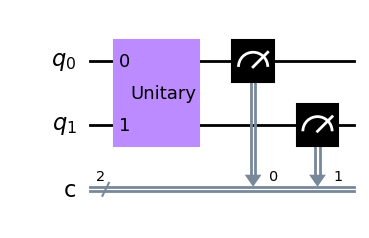

In [17]:
# Create an operator
XX = Operator(Pauli('XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
circ.draw('mpl')

In [18]:
backend = BasicAer.get_backend('qasm_simulator')
circ = transpile(circ, backend, basis_gates=['u1','u2','u3','cx'])
job = backend.run(circ)
job.result().get_counts(0)

/Users/hyunjoon/venv/quantum/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/hyunjoon/venv/quantum/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


{'11': 1024}

In [19]:
# Add to a circuit
circ2 = QuantumCircuit(2, 2)
circ2.append(Pauli('XX'), [0, 1])
circ2.measure([0,1], [0,1])
circ2.draw()

┌────────────┐┌─┐   
q_0: ┤0           ├┤M├───
     │  Pauli(XX) │└╥┘┌─┐
q_1: ┤1           ├─╫─┤M├
     └────────────┘ ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1

## Combining Operators

In [21]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
A.tensor(B)

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [22]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
A.expand(B)

Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.+0.j, -1.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [23]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
A.compose(B)


Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [24]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))
A.compose(B, front=True)

Operator([[ 0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [25]:
# Compose XZ with a 3-qubit identity operator
op = Operator(np.eye(2 ** 3))
XZ = Operator(Pauli('XZ'))
op.compose(XZ, qargs=[0, 2])

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [26]:
# Compose YX in front of the previous operator
op = Operator(np.eye(2 ** 3))
YX = Operator(Pauli('YX'))
op.compose(YX, qargs=[0, 2], front=True)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
          [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [27]:
XX = Operator(Pauli('XX'))
YY = Operator(Pauli('YY'))
ZZ = Operator(Pauli('ZZ'))

op = 0.5 * (XX + YY - 3 * ZZ)
op

Operator([[-1.5+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
          [ 0. +0.j,  1.5+0.j,  1. +0.j,  0. +0.j],
          [ 0. +0.j,  1. +0.j,  1.5+0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j, -1.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [28]:
op.is_unitary()

False

In [29]:
# Compose with a matrix passed as a list
Operator(np.eye(2)).compose([[0, 1], [1, 0]])

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

# Comparison of Operators

In [31]:
Operator(Pauli('X')) == Operator(XGate())

True